In [8]:
#Import the Necessary Libraries

import pandas as pd   #Handles datasets in table format (like Excel).
import numpy as np    #Works with numerical operations.
import matplotlib.pyplot as plt   #Used for creating charts and graphs.
import seaborn as sns   #Used for creating charts and graphs.
from sklearn.model_selection import train_test_split   #Splits the dataset into training and testing parts.
from sklearn.tree import DecisionTreeClassifier, plot_tree   #Builds the decision tree model.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   # Evaluates the model’s accuracy and performance
from sklearn.preprocessing import LabelEncoder   #Converts text (categorical data) into numbers.

In [28]:
#Load the data sets- train and test 

df_train = pd.read_csv("train.csv")  # Update with correct path

In [13]:
# Look at top values of train data


df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Print the column names of train data


print("Columns in train dataset:", df_train.columns.tolist())

Columns in train dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [15]:
# Print the dimension of train and test data


print("Train data shape:", df_train.shape)

Train data shape: (891, 12)


In [66]:
# Print the number of missing values in each column of train and test data

print("\nMissing values in train dataset:\n")
print("Column Names  Number Of Missing Values")
print(df_train.isnull().sum()) 


# .isnull().sum() counts the number of missing values in each column.
# Helps us decide how to handle missing values before training the model.


Missing values in train dataset:

Column Names  Number Of Missing Values
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64


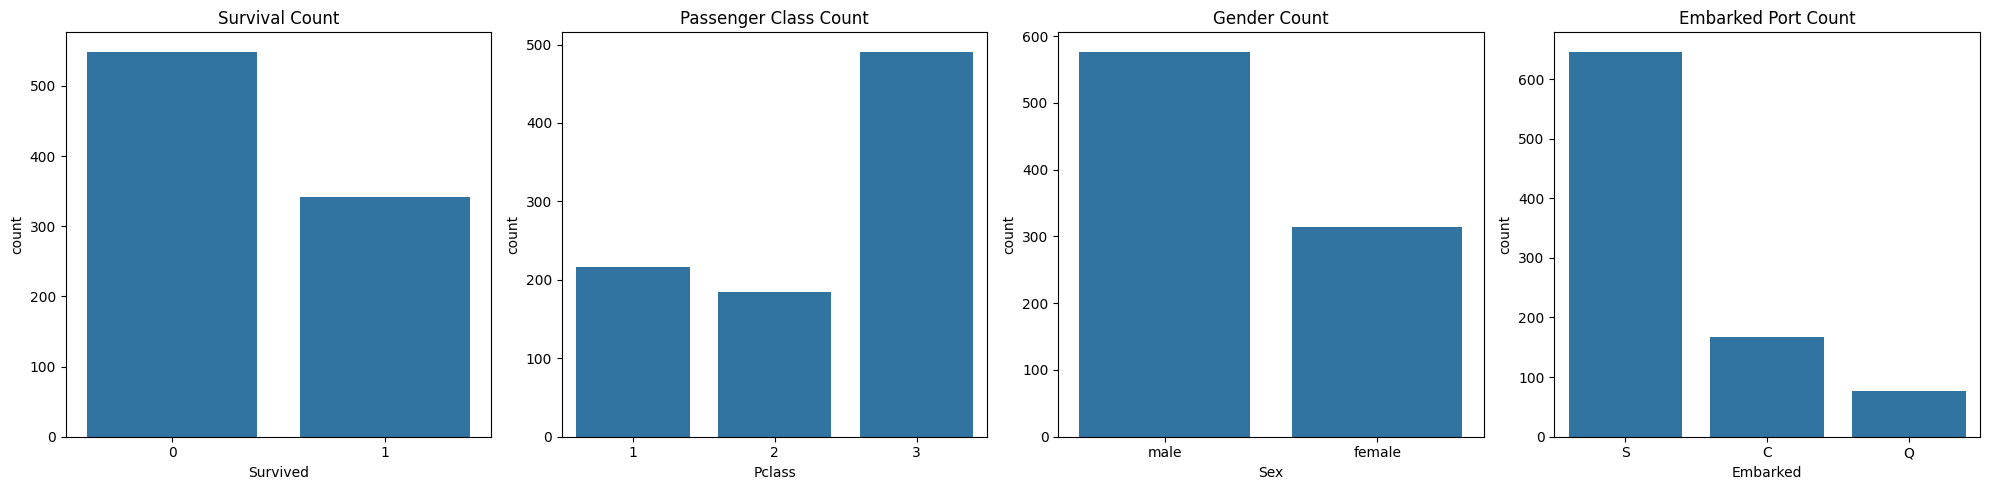

In [72]:
# Barchart of Survived, Pclass, Sex, Embarked


plt.figure(figsize=(20, 5))  #sets the width to 20 and height to 5 (inches)

# Bar chart for Survived column
plt.subplot(1, 4, 1) # Divides the figure into 1 row and 4 columns (1x4 grid).
                    #The 1 at the end means we are placing the first plot in the first position.

sns.countplot(x='Survived', data=df_train) #Uses Seaborn to create a bar chart that counts the number of passengers who survived (1) and did not survive (0).
plt.title("Survival Count")  #Adds a title to the first chart.

# Bar chart for Pclass column
plt.subplot(1, 4, 2)
sns.countplot(x='Pclass', data=df_train)
plt.title("Passenger Class Count")

# Bar chart for Sex column
plt.subplot(1, 4, 3)
sns.countplot(x='Sex', data=df_train)
plt.title("Gender Count")

# Bar chart for Embarked column
plt.subplot(1, 4, 4)
sns.countplot(x='Embarked', data=df_train)
plt.title("Embarked Port Count")

plt.tight_layout()
plt.show()


# What this does?

#Creates bar charts for:
#Survived → Shows how many people survived vs. not survived.
#Pclass → Passenger class distribution (1st, 2nd, 3rd class).
#Sex → Number of male and female passengers.
#Embarked → Where passengers boarded (C = Cherbourg, Q = Queenstown, S = Southampton).

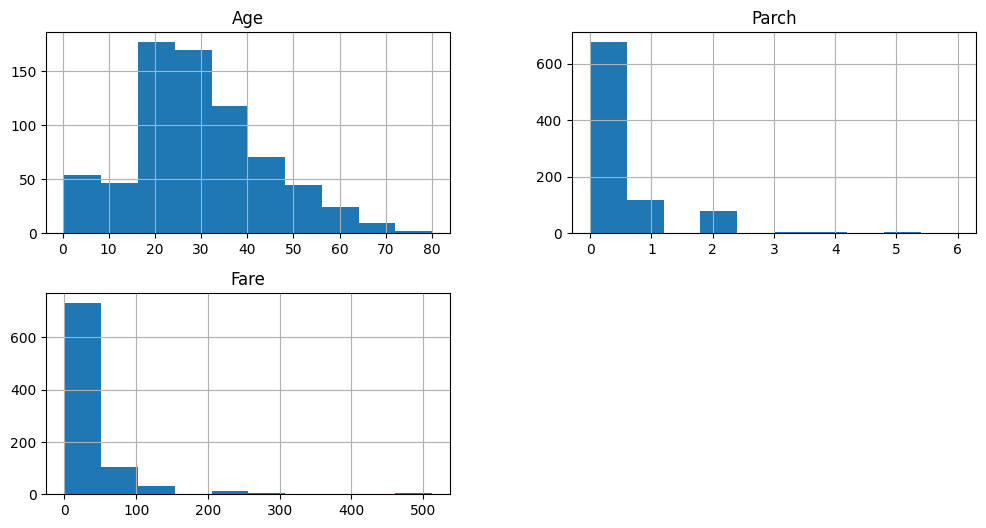

In [19]:
# Histogram of Age, Parch, Fare


df_train[['Age', 'Parch', 'Fare']].hist(figsize=(12, 6))  #figsize = (width, height)
plt.show()

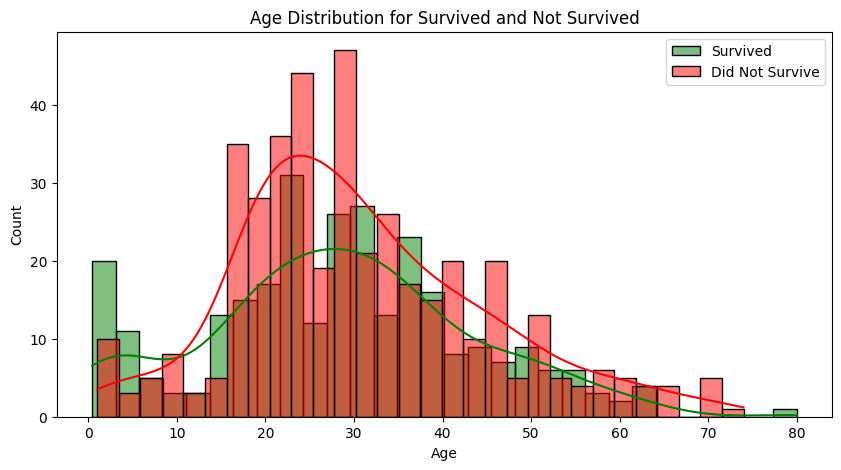

In [20]:
# Plot histogram of age for survived and did not survived class
plt.figure(figsize=(10, 5))
sns.histplot(df_train[df_train['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df_train[df_train['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution for Survived and Not Survived')
plt.show()

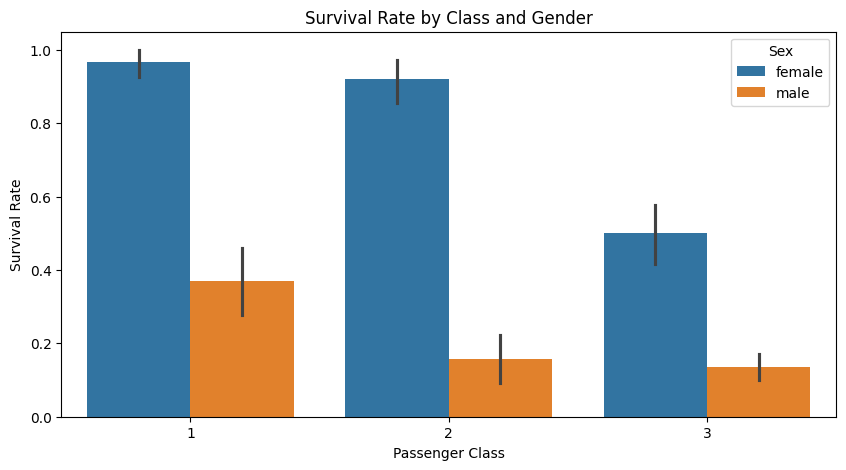

In [21]:
# Count class and gender wise survival rate - plot with appropriate chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class and Gender')
plt.legend(title='Sex')
plt.show()

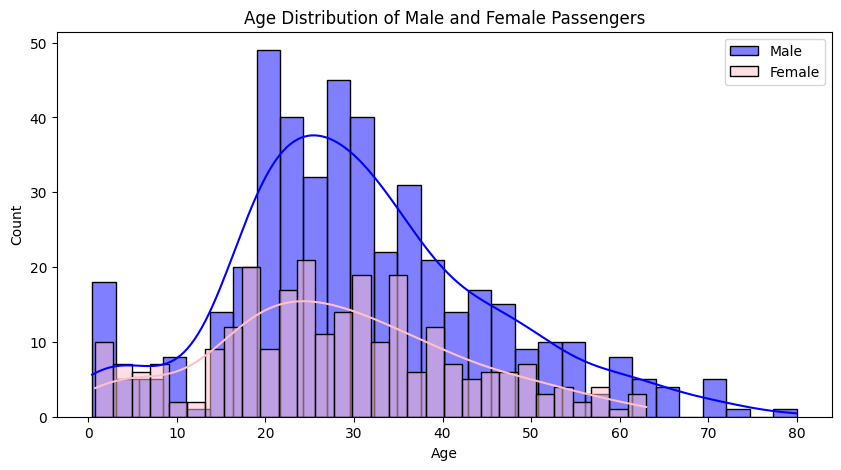

In [22]:
# Age wise Distribution of Male and Female passengers
plt.figure(figsize=(10, 5))
sns.histplot(df_train[df_train['Sex'] == 'male']['Age'], bins=30, kde=True, color='blue', label='Male')
sns.histplot(df_train[df_train['Sex'] == 'female']['Age'], bins=30, kde=True, color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution of Male and Female Passengers')
plt.show()

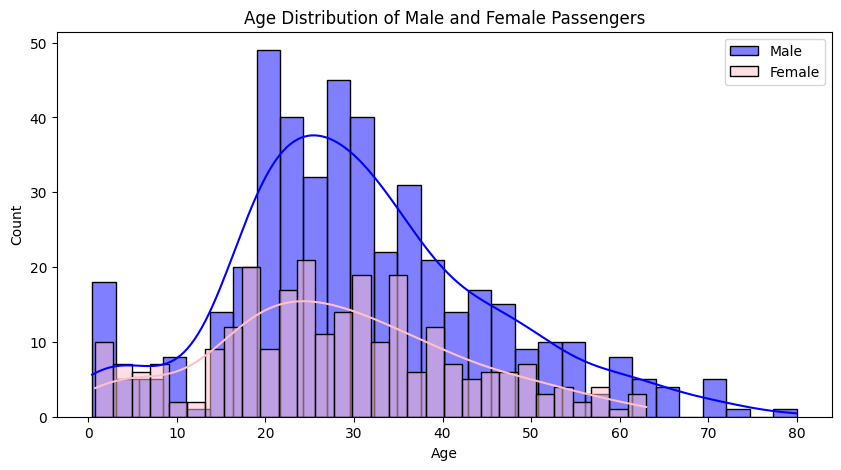

In [23]:
# Age wise Distribution of Male and Female passengers
plt.figure(figsize=(10, 5))
sns.histplot(df_train[df_train['Sex'] == 'male']['Age'], bins=30, kde=True, color='blue', label='Male')
sns.histplot(df_train[df_train['Sex'] == 'female']['Age'], bins=30, kde=True, color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution of Male and Female Passengers')
plt.show()

In [30]:
# Replace the missing values in Embarked column by 'S'
df_train['Embarked'].fillna('S', inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
# Impute the missing values in Age column with mean value
df_train['Embarked'].fillna('S', inplace=True)
df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)
df_train


# What this does?

# Fills missing values in Embarked with 'S' (since most people boarded from Southampton).
# Fills missing values in Fare with the median fare (middle value of all fares).


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [36]:
# Impute the Age column. It has too many missing values but it may be important.
# We fill the missing values with numbers randomly drawn from distribution
# that has same mean and standard deviation as non-missing Age data
mean_age = df_train['Age'].mean()
std_age = df_train['Age'].std()
nan_count = df_train['Age'].isnull().sum()
df_train.loc[df_train['Age'].isnull(), 'Age'] = np.random.normal(mean_age, std_age, nan_count)
df_train


#  What this does?

# Since Age has missing values, we fill them with random numbers that follow the same average (mean) and spread (standard deviation) as the original data.
# This avoids bias in the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [70]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = (df_train['FamilySize'] == 1).astype(int)
df_train


# What this does?

# Creates a new column FamilySize → Adding SibSp (siblings/spouses) and Parch (parents/children) to know family size.
# Creates a new column IsAlone → If FamilySize is 1, the person is alone (1), otherwise not (0).


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [48]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_cols = [col for col in cols_to_drop if col in df_train.columns]

if existing_cols:
    df_train.drop(columns=existing_cols, inplace=True)
else:
    print("Columns already dropped or not found in dataset:", cols_to_drop)


df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [52]:
# Prepare X and y
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Columns in X:", X.columns.tolist())
print("First few values of y:\n", y.head())



# What this does?

# X contains all columns except Survived (features used for prediction).
# y contains only the Survived column (our target variable).


Shape of X: (891, 9)
Shape of y: (891,)
Columns in X: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
First few values of y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [55]:
# Label encoding of categorical features
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    X[col] = le.fit_transform(X[col])

print("Unique values in X['Sex'] after encoding:", X['Sex'].unique())
print("Unique values in X['Embarked'] after encoding:", X['Embarked'].unique())


# What this does?

# Converts text data into numbers (Sex and Embarked).
# male → 1, female → 0
# S → 2, C → 0, Q → 1

Unique values in X['Sex'] after encoding: [1 0]
Unique values in X['Embarked'] after encoding: [2 0 1]


In [59]:
# Splitting the data into train and validation set - 90% train, 10% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


# What this does?

# Splits 90% of data for training (X_train, y_train).
# Keeps 10% of data for validation (X_val, y_val).

                 
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (801, 9)
X_val shape: (90, 9)
y_train shape: (801,)
y_val shape: (90,)


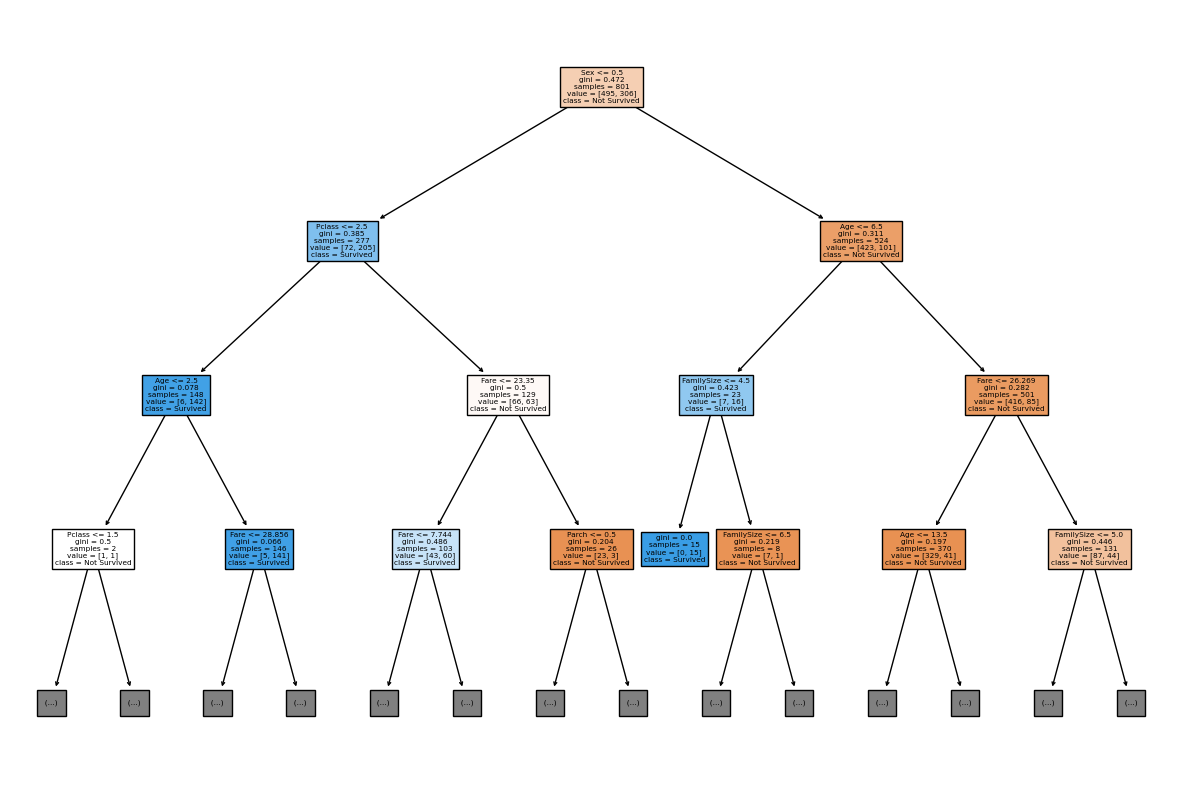

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        54
           1       0.71      0.75      0.73        36

    accuracy                           0.78        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.78      0.78      0.78        90

Confusion Matrix:
 [[43 11]
 [ 9 27]]
Accuracy Score: 0.7777777777777778


In [71]:
# Create the model
model = DecisionTreeClassifier(random_state=42)

# Fitting the decision tree with default hyperparameters
model.fit(X_train, y_train)

# What this does?

# Creates a Decision Tree model.
# Fits (trains) the model using X_train and y_train

# Plotting tree with max_depth=3
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, max_depth=3)
plt.show()

# What this does?

# Plots the Decision Tree structure.
# Shows how the model makes decisions.


# Making predictions
y_pred = model.predict(X_val)

# Printing classification report
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))


# What this does?

# Uses the model to predict survival for validation data (y_pred).
# Prints performance metrics:
# Accuracy → How many predictions were correct?
# Precision & Recall → How well the model predicts survivors vs. non-survivors?
# Confusion Matrix → Breaks down true vs. false predictions

In [62]:
# Printing confusion matrix and accuracy
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))


Confusion Matrix:
 [[43 11]
 [ 9 27]]
Accuracy Score: 0.7777777777777778
